# Create subplots
If you want to plot several maps on the same figure you can shift the plots around to create subplots. Here we'll download 2 different datasets and plot them on the same figure.

Import the modules

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import os

from polartoolkit import fetch, maps

In [2]:
# set default to southern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

Define the region of interest and fetch the datasets

In [3]:
# manually define a geographic region in meters in the South Polar Stereograph
# Projection (EPSG) in the format (x_min, xmax, y_min, y_max)
region = (-1800e3, -1000e3, -1200e3, -700e3)

grid1 = fetch.bedmap2(layer="bed", region=region)
grid2 = fetch.gravity(version="antgg-update", anomaly_type="FA", region=region)

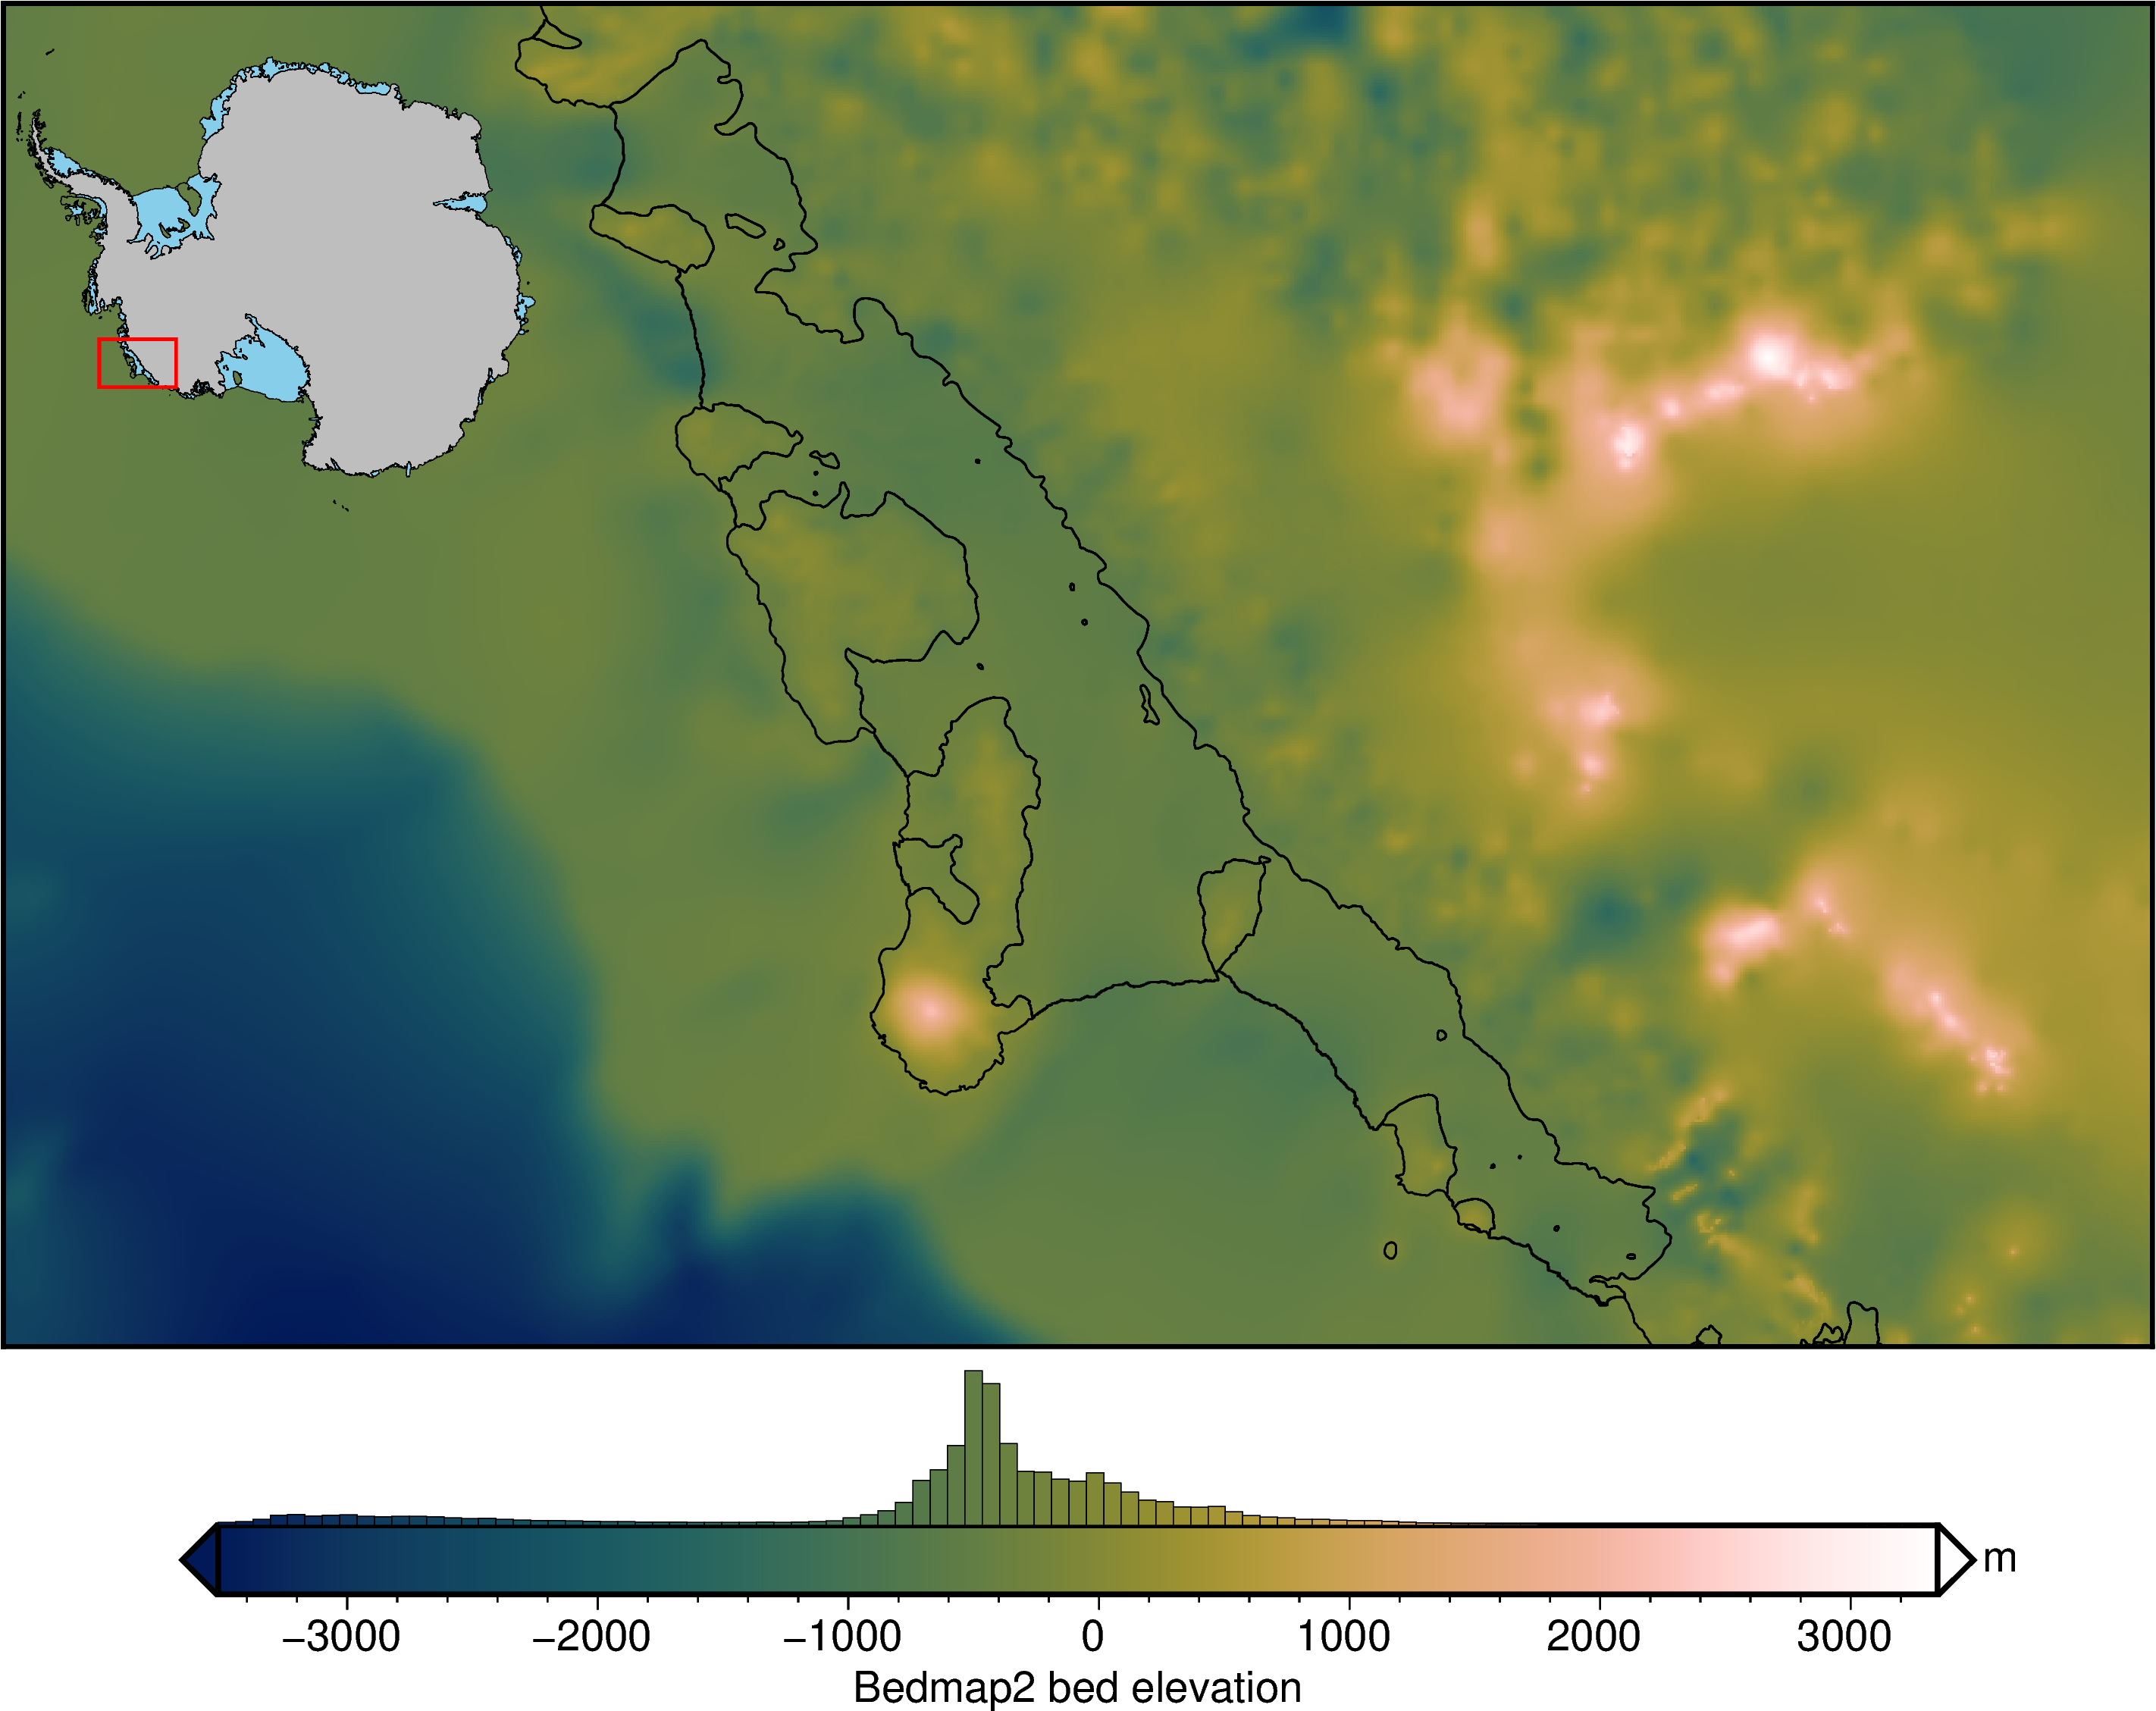

In [4]:
fig = maps.plot_grd(
    grid1,
    cmap="batlowW",
    coast=True,
    cbar_label="Bedmap2 bed elevation",
    cbar_unit="m",
    hist=True,
    inset=True,
)

# display the figure
fig.show()

Add the second figure below by passing the `fig` variable to `plot_grd`, and specifying which direction (and optional how much) to shift the plot.

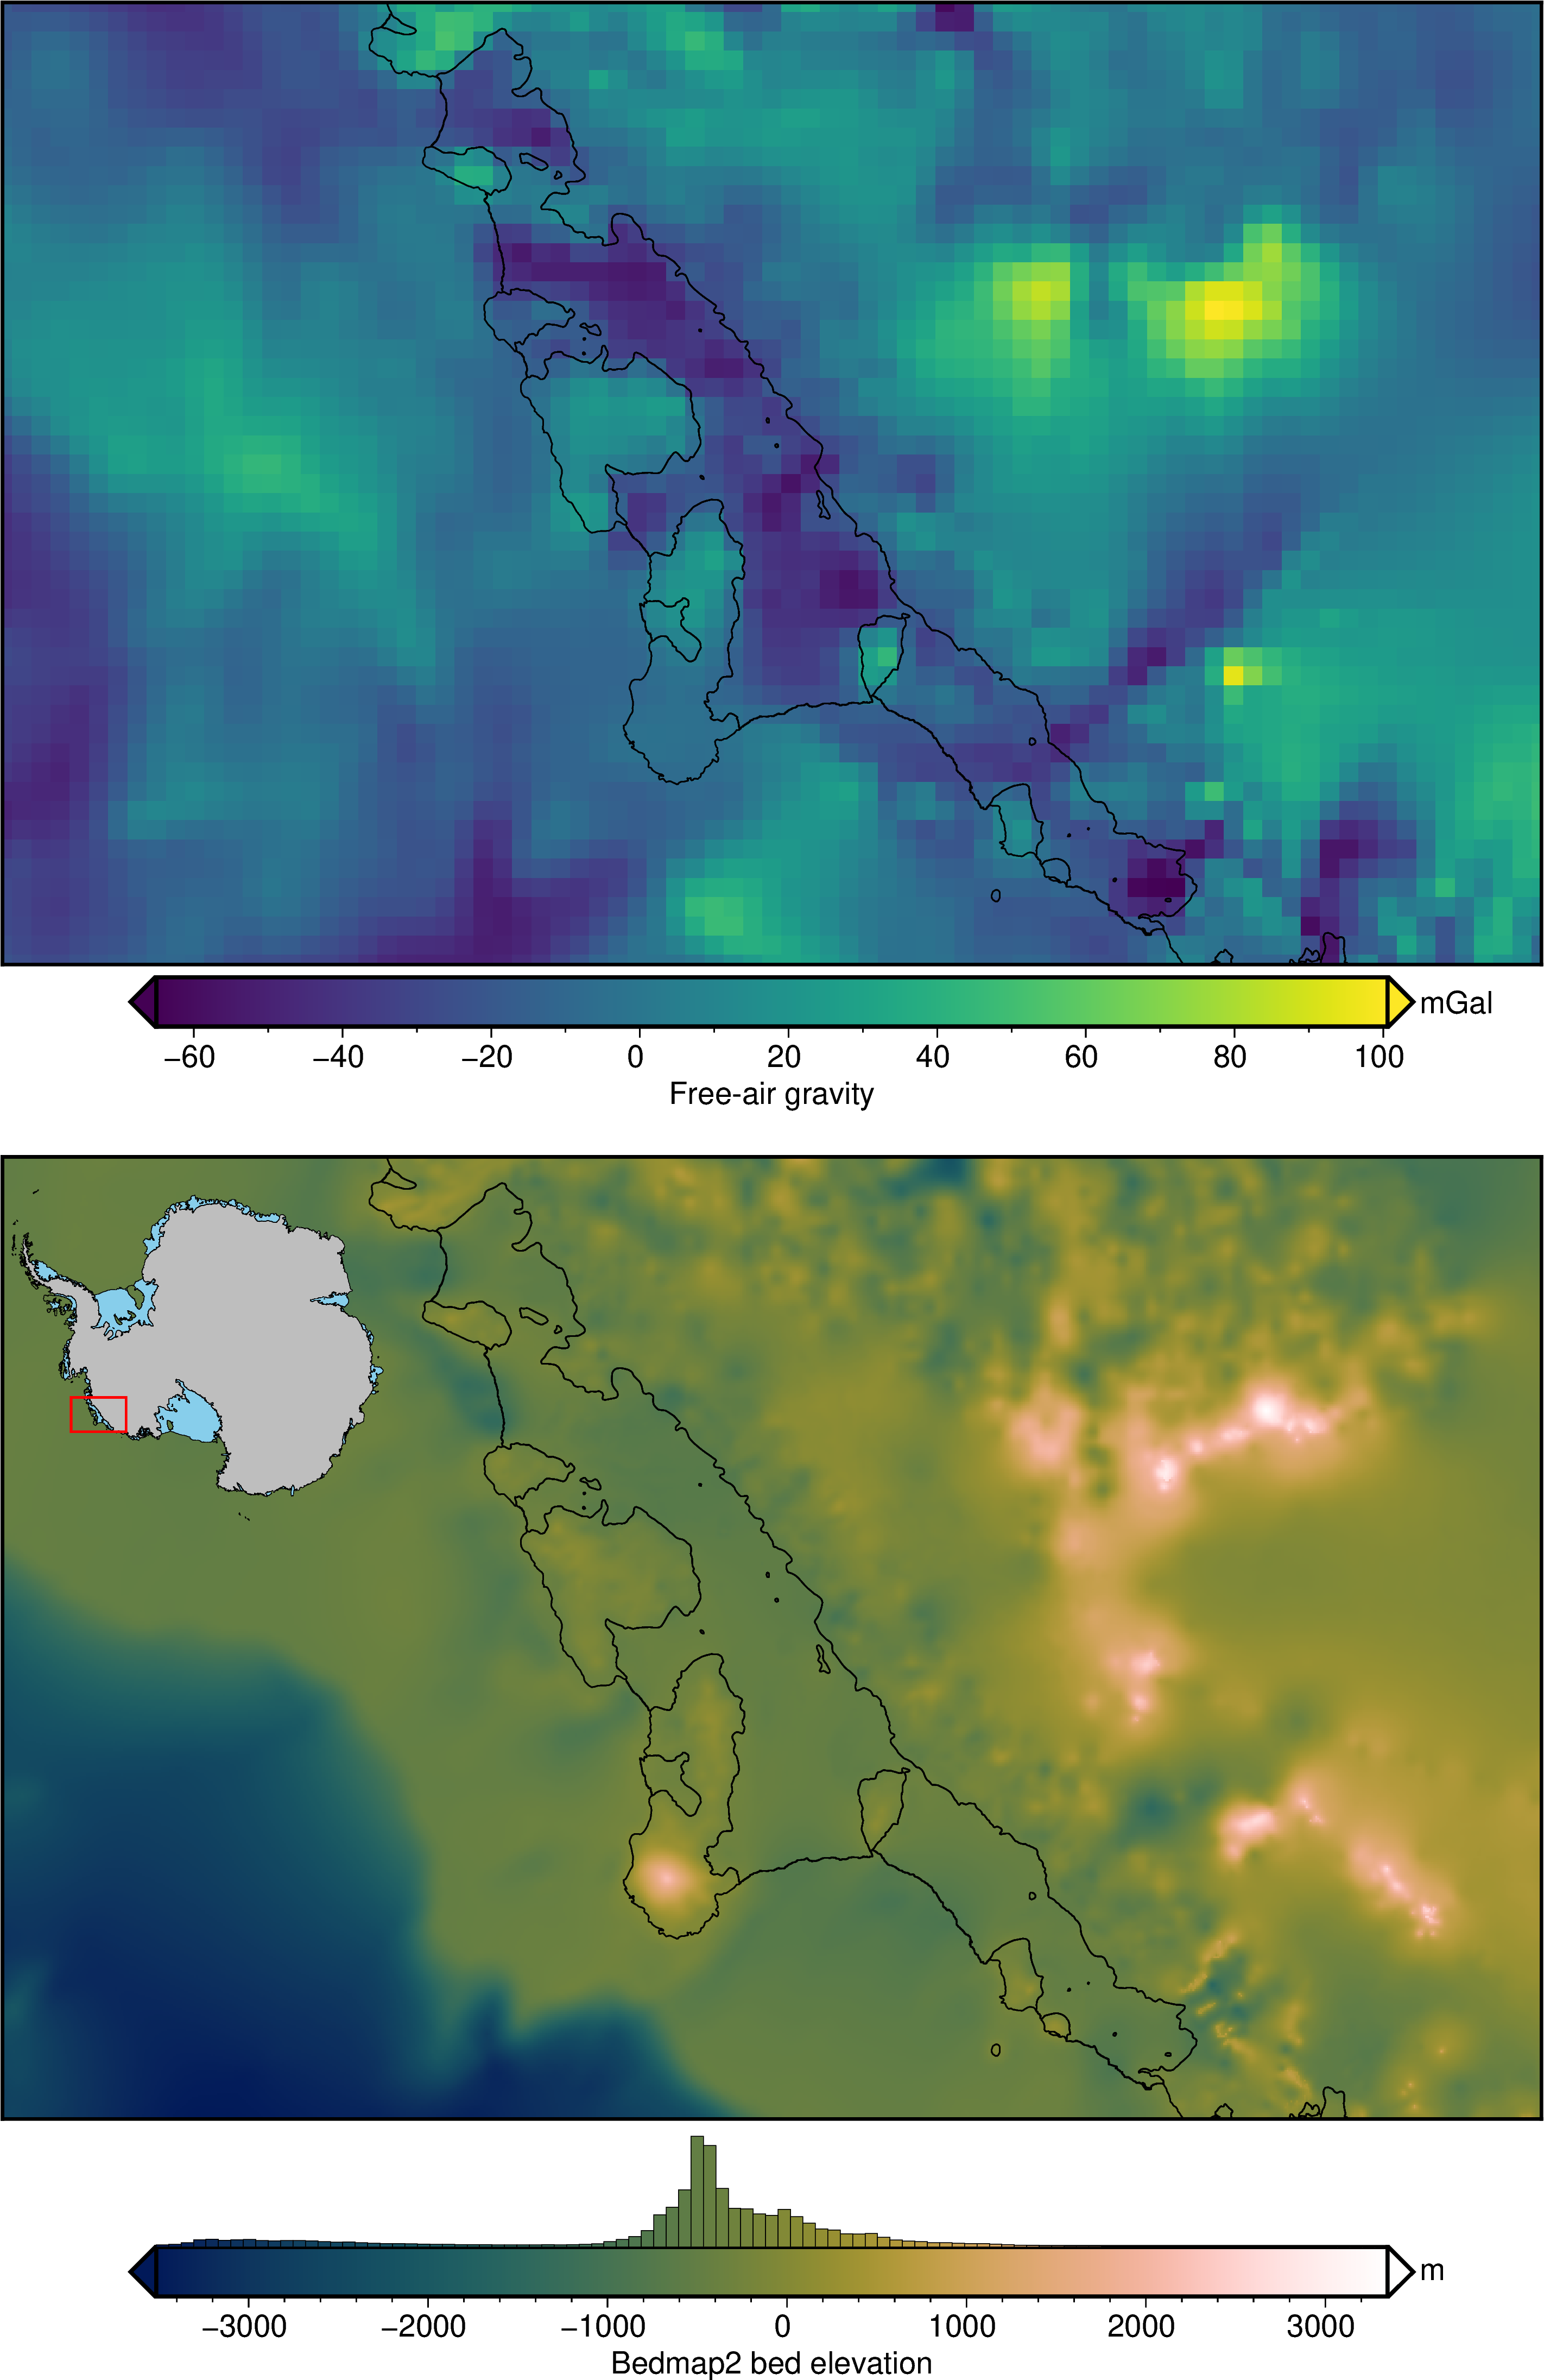

In [5]:
fig = maps.plot_grd(
    grid2,
    fig=fig,
    origin_shift="yshift",  # shift in vertical direction
    # yshift_amount=1,  # optionally tell how much to shift by
    # in multiples of current figure dimensions
    cmap="viridis",
    coast=True,
    cbar_label="Free-air gravity",
    cbar_unit="mGal",
)

# display the figure
fig.show()

There are several other methods for creating subplots. See them in [this how-to guide](../how_to/subplot_layout.ipynb).